# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
# Difference in stock price
df["Diff"] = df["Adj Close"].diff().shift(-1)

# Target up or down
df["Target"] = np.sign(df["Diff"])

# Option Premium
df["Premium"] = 0.08 * df["Adj Close"]

In [7]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data and build a LogReg on column 2

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [8]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [10]:
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [11]:
df["Predictions"] = y_pred

In [22]:
df["Profits"] = 0.

# True positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits"] = df["Premium"]

# False positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"] = 100*df["Diff"] + df["Premium"]

# 5.) Plot profits over time

<function matplotlib.pyplot.show(close=None, block=None)>

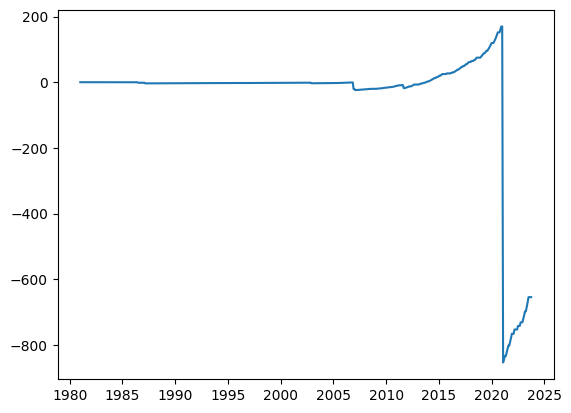

In [23]:
plt.plot(np.cumsum(df["Profits"]))
plt.show

# 5.5.) How your skills valuable to PJ and/or Philip Liu

<font size = 3>My academic background in quantitative economics is relevant and valuable in the context of blockchain and decentralized finance platforms like StarsArena.com. The ability to analyze financial data and apply econometric skills is important for understanding market trends and financial models within the blockchain space. Also, Statistical knowledge enables thorough data analysis, which is essential in the financial context of blockchain. Besides, machine learning skills can be used to predict market trends, user behavior, and other financial indicators on blockchain platforms. This skill set is helpful when making informed decisions in the complex financial interactions platforms.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.